# Project on Medical Insurance Data

Task: To build machine learning models for the task of predicting whether the customers will buy medical insurance or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
medical = pd.read_csv("C:/Users/User/Documents/AI DATA SET/examples/Medical_insurance_dataset.csv")
medical.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [3]:
#To drop the user id column since it is not useful in the prediction
medical.drop(['User ID'], axis = "columns", inplace=True)

In [4]:
#View the data again
medical.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased


In [5]:
#To change the target  variable which is Purchased into 0-not purchase and 1-purchased.
medical["Purchased"] = medical["Purchased"].apply(lambda x: 1 if x == 'purchased' else 0)

In [6]:
#To view the medical data
medical.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Exploratory Data Analysis

<AxesSubplot:xlabel='Purchased', ylabel='count'>

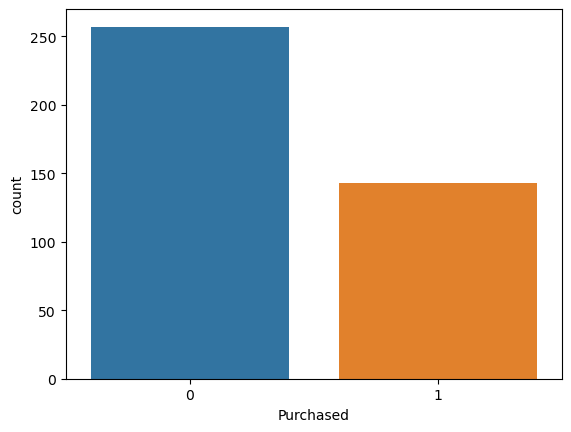

In [7]:
#To plot a bar chart for those who want to purchase or not

sns.countplot(x = 'Purchased', data = medical)

The majority of those that visit the medical insurance company did not want to buy the insurance.

<AxesSubplot:xlabel='Gender', ylabel='count'>

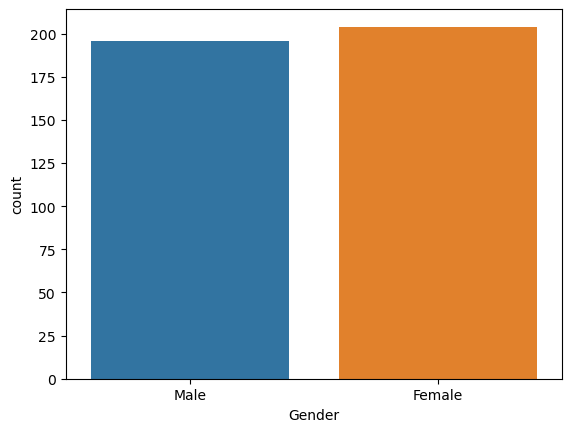

In [8]:
#To plot a bar chart for gender
sns.countplot(x = 'Gender', data = medical)

The proportion of males are almost the same as females

<AxesSubplot:xlabel='Gender', ylabel='count'>

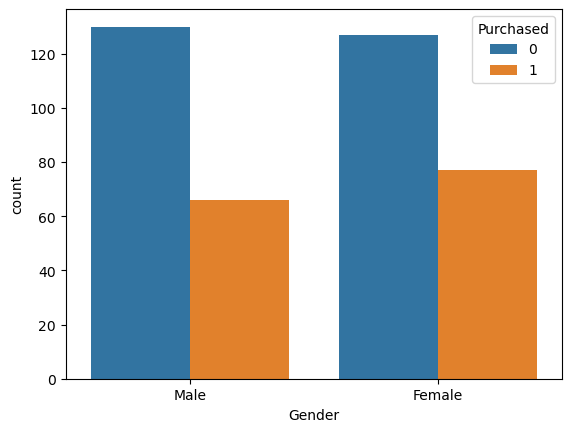

In [9]:
#To plot a bar chart for gender based on those who want to purchase or not
sns.countplot(x = 'Gender', hue = 'Purchased', data = medical)

It seems that females wanted to purchase the insurance when compared with males.

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

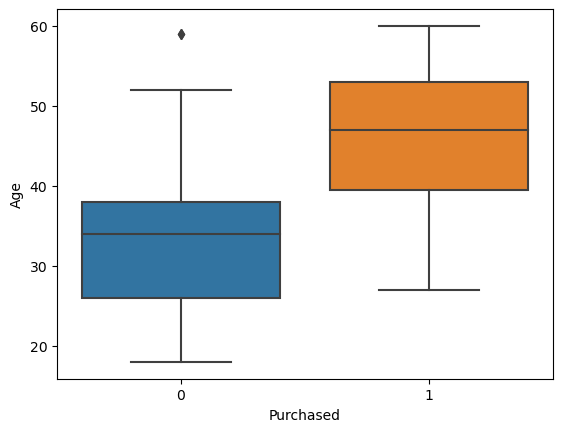

In [10]:
#To check for the distribution of age based on those who want to purchase or not
sns.boxplot(x = 'Purchased', y = 'Age', data = medical)

From the look of things, older people purchased insurance compared with younger people

<AxesSubplot:xlabel='Gender', ylabel='Age'>

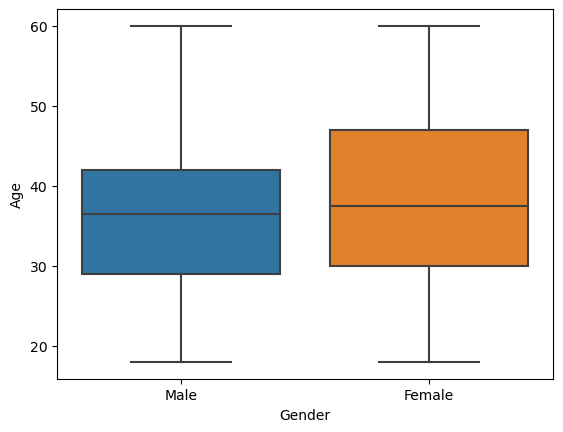

In [11]:
#To check for the distribution of age based on gender
sns.boxplot(x = 'Gender', y = 'Age', data = medical)

From the chart, females seem to be older than the males

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

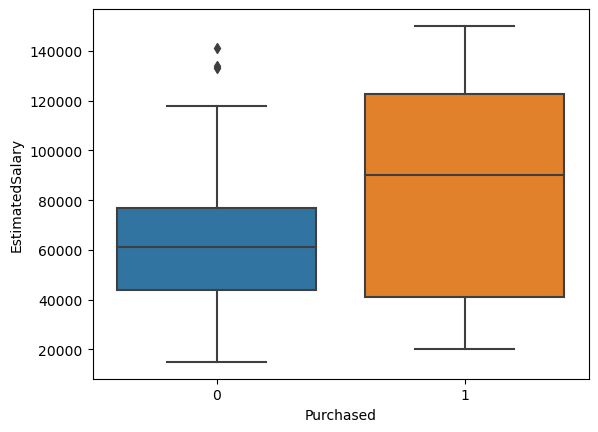

In [12]:
#To check for the distribution of Estimated Dalary based on those who want to purchase or not
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = medical)

People that earned higher salary purchased the insurance while those that earned low did not purchase the insurance. Of course, it is expected you purchase a medical insurance when you 
have money.


# Model Building

In [13]:
#import the model necessary for evaluating metrics
from sklearn import metrics

#import the model for splitting the data
from sklearn.model_selection import train_test_split

In [14]:
#To separate the label(dependent variable) from the features(independent variables)

x = medical.drop(["Purchased"], axis = "columns")
y = medical["Purchased"]

In [15]:
x.head(5)

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [16]:
#We need to change the categorical data into a numeric by using one-hot-encoding
X = pd.get_dummies(x)
X.head(5)

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


Split the data into training and test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 1234)

First, we want to train with the Logistic Regression model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logisticmodel = LogisticRegression()

In [20]:
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [21]:
#To make predictions
logisticmodel_prediction = logisticmodel.predict(X_test)
logisticmodel_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [22]:
#To create a confusion matrix

def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize =(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.label('Truth', fontsize = 13)
    plt.title('A confusion matrix')

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

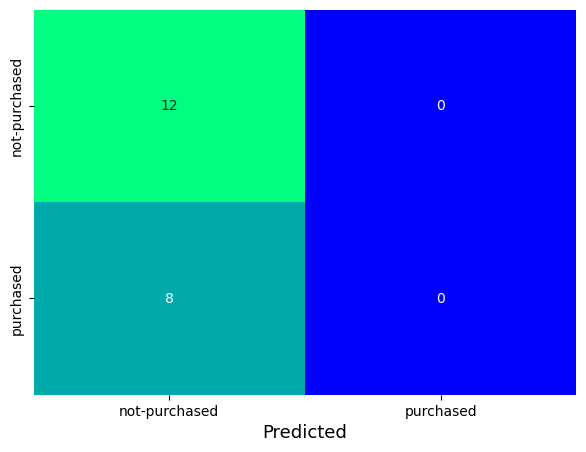

In [23]:
ConfusionMatrix(y_test, logisticmodel_prediction, label=["not-purchased", "purchased"])

In [24]:
#To check for accuracy
metrics.accuracy_score(y_test, logisticmodel_prediction)

0.6

The accuracy of the model is 60.00% . We cannot trust this accuracy since the data is class imbalanced. Therefore, we are going to use F1 score instead.

In [25]:
#Using F1 score
metrics.f1_score(y_test, logisticmodel_prediction)

0.0

# To train with the Naive Bayes model

In [28]:
#Import the model
from sklearn.naive_bayes import GaussianNB

In [29]:
naivemodel = GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB()

In [30]:
#To predict
naivemodel_predict = naivemodel.predict(X_test)
naivemodel_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

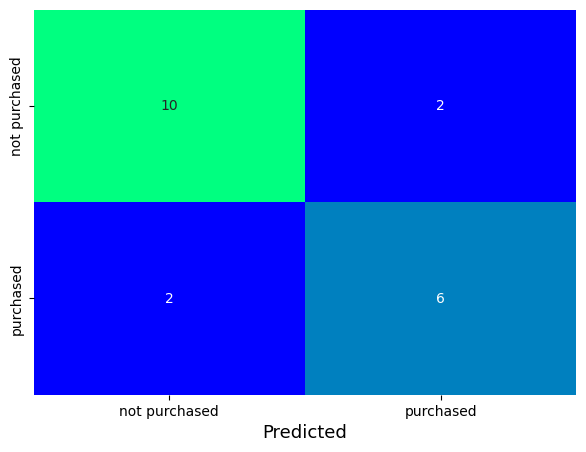

In [31]:
ConfusionMatrix(y_test, naivemodel_predict, label = ["not purchased", "purchased"])

Interpretation of the Naive Bayes model evaluation performance
- There are 10 True Negatives (TN): predicting that the customer will not buy the insurance and 
truly the customer did not buy the insurance.
- There are 6 True Positives (TP): predicting that the customer will buy the insurance and truly 
the customer did buy the insurance.
- There are 2 False Negatives (FN): predicting that the customer will not buy the insurance and 
the customer actually bought the insurance.
- There are 2 False Positives (FN): predicting that the customer will buy the insurance and the 
customer did not buy the insurance.

To Evaluate the metrics, 
We are going to check the accuracy and F1 score of the models.

In [32]:
#Checking for accuracy
metrics.accuracy_score(y_test, naivemodel_predict)

0.8

The accuracy of the model is 80%

In [34]:
#Using the F1 score
metrics.f1_score(y_test, naivemodel_predict)

0.75

The F1 score of the model is 75%

From the result, this model seems good in predicting whether a patient will buy insurance or not.

# To train with Random Forest Model

In [36]:
#Import the model
from sklearn.ensemble import RandomForestClassifier

In [37]:
randomforest = RandomForestClassifier()

In [38]:
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
#To predict
randomforest_predict = randomforest.predict(X_test)
randomforest_predict

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

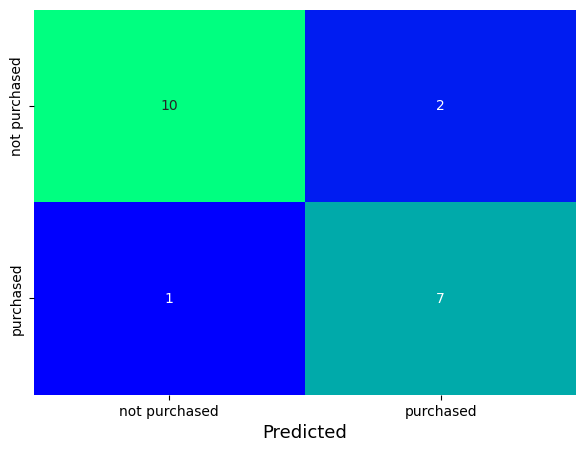

In [40]:
ConfusionMatrix(y_test, randomforest_predict, label = ["not purchased", "purchased"])

Interpretation of the Naive Bayes model evaluation performance

There are 10 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.
There are 7 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance.
There are 1 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.
There are 2 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.

In [41]:
#To evaluate with accuracy
metrics.accuracy_score(y_test, randomforest_predict)

0.85

The accuracy of the model is 85%

In [43]:
#To evaluate using f1 score
metrics.f1_score(y_test, randomforest_predict)

0.823529411764706

The accuracy of the model is 82.35%

The model seems good in predicting whether a patient will buy insurance or not.

# To train with Support Vector Machine (SVM)

In [46]:
from sklearn.svm import SVC
SVMmodel = SVC()

In [47]:
SVMmodel.fit(X_train, y_train)

SVC()

In [49]:
#To predict
SVMmodel_predict = SVMmodel.predict(X_test)
SVMmodel_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

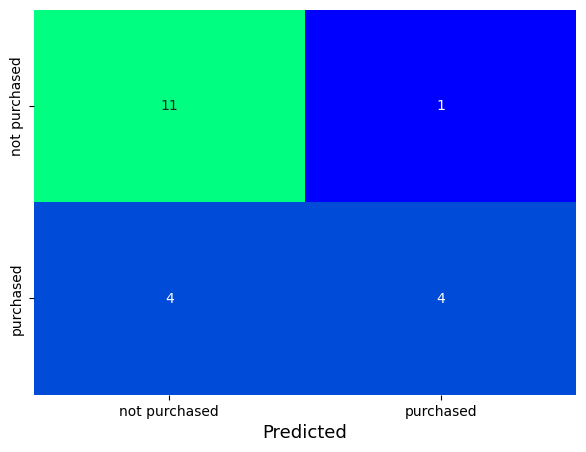

In [50]:
ConfusionMatrix(y_test, SVMmodel_predict, label = ["not purchased", "purchased"])

Interpretation of the Naive Bayes model evaluation performance

There are 11 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance. There are 4 True Positives (TP): predicting that the customer will buy the insurance and truly the customer did buy the insurance. There are 4 False Negatives (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance. There are 1 False Positives (FN): predicting that the customer will buy the insurance and the customer did not buy the insurance.

To Evaluate with metrics

In [51]:
#To use accuracy score
metrics.accuracy_score(y_test, SVMmodel_predict)

0.75

The accuracy of the model is 75%

In [52]:
#To use f1 score
metrics.f1_score(y_test, SVMmodel_predict)

0.6153846153846154

The accuracy of the model is 61.54%

Having train all the five (4) models, we can see that the best model that can accurately predict whether 
a customer will buy the insurance or not  in terms of F1 Score is the Random Forest Model. 